In [1]:
import sys
sys.path.append('..')

In [2]:
from sklearn.mixture import GaussianMixture

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
# loading the sameple datasets into DataFrames
data_1 = pd.read_csv("../data/1_space_cluster_samples.csv")
data_3 = pd.read_csv("../data/3_space_cluster_samples.csv")
data_5 = pd.read_csv("../data/5_space_cluster_samples.csv")
data_7 = pd.read_csv("../data/7_space_cluster_samples.csv")

# pulling the data that will be used to train the model out of the datasets and storing them to individual DataFrames
# using the attribute '.values' to convert the data into a 2D numpy array
X_1 = data_1[[str(x) for x in range(1, 10)]].values
X_3 = data_3[[str(x) for x in range(1, 10)]].values
X_5 = data_5[[str(x) for x in range(1, 10)]].values
X_7 = data_7[[str(x) for x in range(1, 10)]].values

# putting the training data into a list so we can iteratively test models
X = [X_1, X_3, X_5, X_7]

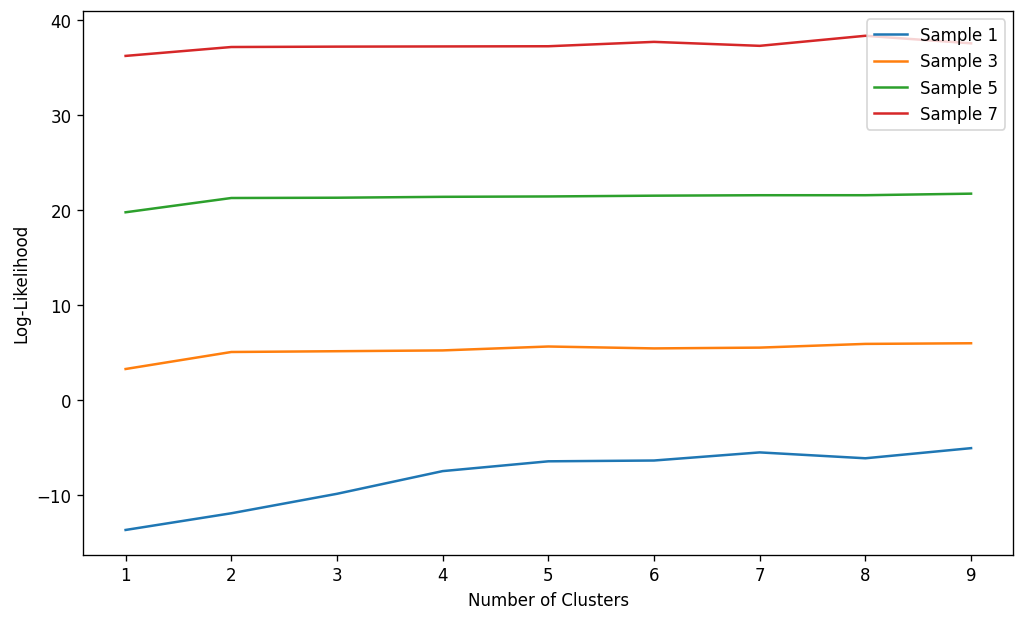

In [4]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(X):
    ll = dict()
    for k in range(1, 10):
        gmm = GaussianMixture(n_components=k, max_iter=2500).fit(df)
        ll[k] = gmm.score(df) # log-likelihood of the model
    plt.plot(list(ll.keys()), list(ll.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("Log-Likelihood")
plt.legend(loc="upper right")
plt.show()

We can see a trend with three of our of sample data sets where an elbow appears at n=2 components.

In [5]:
# training a model to save for evaluation during a game of TTT
gmm_model = GaussianMixture(n_components=2)
gmm_model.fit(X_5)
gdf = pd.DataFrame(gmm_model.predict_proba(X_7))
gdf

,0,1
0,1.000000e+00,4.565966e-28
1,6.537484e-39,1.000000e+00
2,2.995070e-34,1.000000e+00
3,1.000000e+00,8.935737e-26
4,2.354980e-55,1.000000e+00
...,...,...
295,1.437211e-57,1.000000e+00
296,1.000000e+00,5.203655e-34
297,1.197236e-44,1.000000e+00
298,1.000000e+00,4.686099e-31


In [6]:
# saving the model with pickle so it can be loaded into another program
pickle.dump(gmm_model, open("../model_binaries/gmm.sav", "wb"))